2 Compresión de imágenes
En el archivo dataset_imagenes1.zip se encuentran n imágenes. Cada imagen es una matriz de p × p que
puede representarse como un vector x ∈ Rp∗p. A su vez, es posible armar un matriz de datos apilando los
vectores de cada imagen generando una matriz de n × (p ∗ p). Se desea aprender una representación de baja
dimensión de las imágenes mediante una descomposición en valores singulares.
1. Aprender una representación basada en Descomposición de Valores Singulares utilizando las n imágenes.
2. Visualizar en forma matricial p × p las imágenes reconstruidas luego de compresión con distintos
valores de d dimensiones ¿Qué conclusiones pueden sacar?

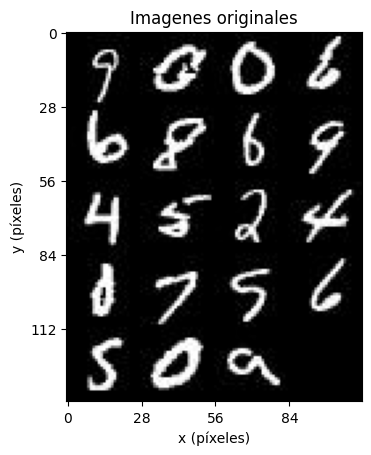

In [195]:
from matplotlib.image import imread
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
import os

folder = "C:/Users/juand/OneDrive/Documentos/Workspace/I202/I202TP34/TP3/datasets_imgs"

image_names = os.listdir(folder)
image_names.sort()
n = len(image_names)
p = len(imread(folder + "/" + image_names[0]))
A = np.zeros((n,p**2))

for i in range(n):
    A[i] = imread(folder + "/" + image_names[i]).flatten()

U, S, VT = np.linalg.svd(A, full_matrices = False)
S = np.diag(S)

collage = np.zeros((140, 112))
for i in range(n):
    for f in range(p):
        for c in range(p):
            collage[f + (i // 4) * 28, c + (i % 4) * 28] = A[i].reshape((p,p))[f,c]

plt.figure()
img = plt.imshow(collage, cmap = 'gray')
plt.xticks(np.arange(0, collage.shape[1], 28))
plt.yticks(np.arange(0, collage.shape[0], 28))
plt.xlabel('x (píxeles)')
plt.ylabel('y (píxeles)')
plt.title('Imagenes originales')
plt.show()

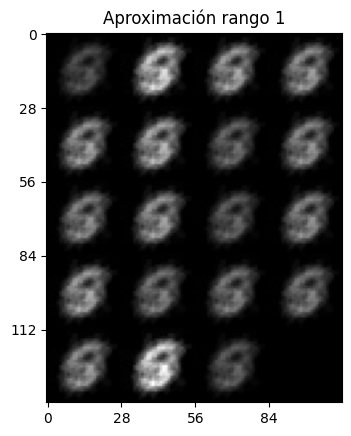

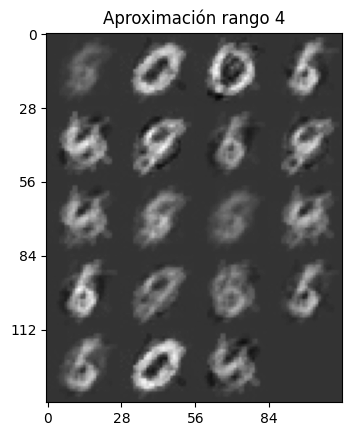

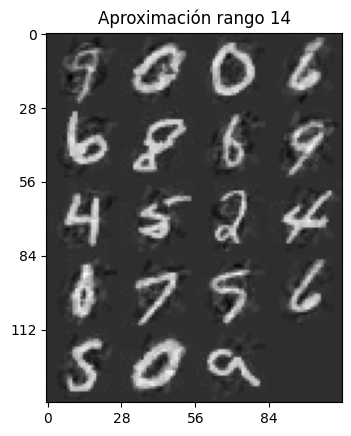

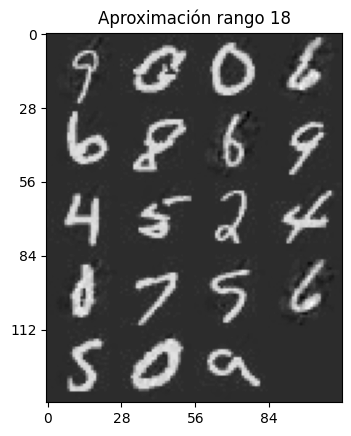

In [196]:
collages = {}
aproxs = {}
for d in range(n):
    collage = np.zeros((5*p, 4*p))
    for i in range(n):
        aprox = U[:,:d]@S[:d,:d]@VT[:d,:]
        for f in range(p):
            for c in range(p):
                collage[f + (i // 4) * 28, c + (i % 4) * 28] = aprox[i].reshape((p,p))[f,c]
    aproxs[d] = aprox
    collages[d] = collage
    
for d in (1, 4, 14, 18):
    plt.figure()
    img = plt.imshow(collages[d], cmap = 'gray')
    plt.xticks(np.arange(0, collages[d].shape[1], 28))
    plt.yticks(np.arange(0, collages[d].shape[0], 28))
    plt.title(f'Aproximación rango {d}')
    plt.show()

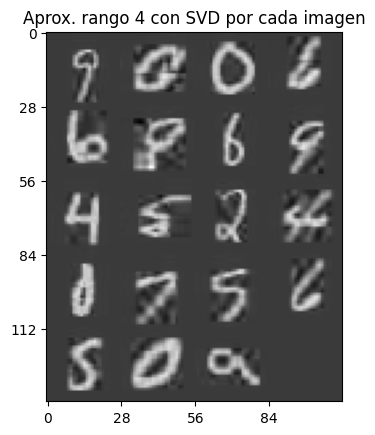

In [197]:
d = 4
collage = np.zeros((5*p, 4*p))
for i in range(n):
    U, S, VT = np.linalg.svd(A[i].reshape((p,p)), full_matrices = False)
    S = np.diag(S)
    aprox = U[:,:d]@S[:d,:d]@VT[:d,:]
    for f in range(28):
        for c in range(28):
            collage[f + (i // 4) * 28, c + (i % 4) * 28] = aprox[f,c]

plt.figure()
img = plt.imshow(collage, cmap = 'gray')
plt.xticks(np.arange(0, collage.shape[1], 28))
plt.yticks(np.arange(0, collage.shape[0], 28))
plt.title(f'Aprox. rango {d} con SVD por cada imagen')
plt.show()
 

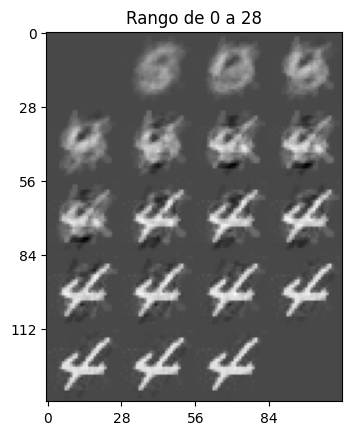

In [198]:
index_selected = 11
collage = np.zeros((5*p, 4*p))
for d in range(n):
    for f in range(p):
        for c in range(p):
            collage[f + (d // 4) * 28, c + (d % 4) * 28] = aproxs[d][index_selected].reshape((p,p))[f,c]

plt.figure()
img = plt.imshow(collage, cmap = 'gray')
plt.xticks(np.arange(0, collage.shape[1], 28))
plt.yticks(np.arange(0, collage.shape[0], 28))
plt.title('Rango de 0 a 28')
plt.show()

3. Utilizando compresión con distintos valores de d medir la similaridad entre pares de imágenes (con
alguna métrica de similaridad que decida el autor) en un espacio de baja dimensión d. Analizar cómo
la similaridad entre pares de imágenes cambia a medida que se utilizan distintos valores de d. Cuales
imágenes se encuentran cerca entre si? Alguna interpretación al respecto? Ayuda: ver de utilizar una
matriz de similaridad para visualizar todas las similaridades par-a-par juntas.

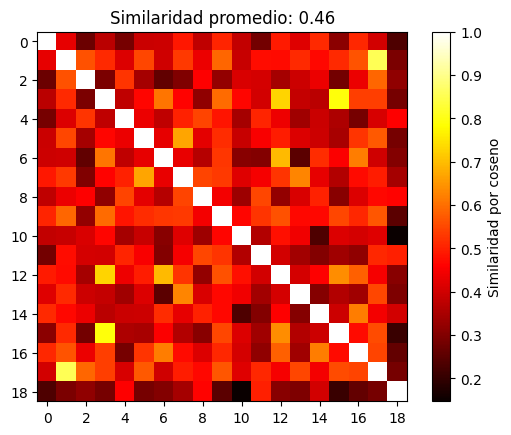

In [199]:
A_norm = np.zeros((n,p**2))
for i in range(n):
    A_norm[i] = A[i] / np.linalg.norm(A[i])
    
similarity_matrix = A_norm@A_norm.T
mean_similarity = np.mean(similarity_matrix)

plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Similaridad por coseno')
plt.title(f'Similaridad promedio: {mean_similarity:.2f}')
plt.xticks(range(0, 20, 2))
plt.yticks(range(0, 20, 2))
plt.show()


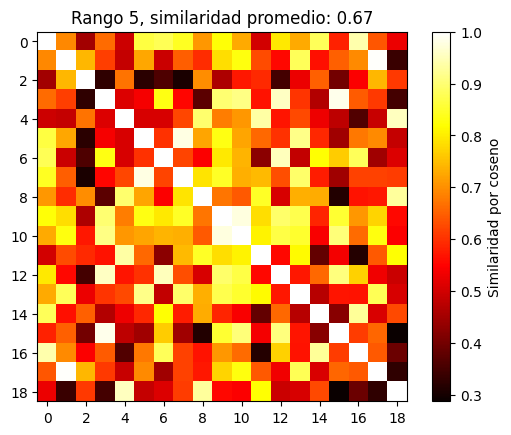

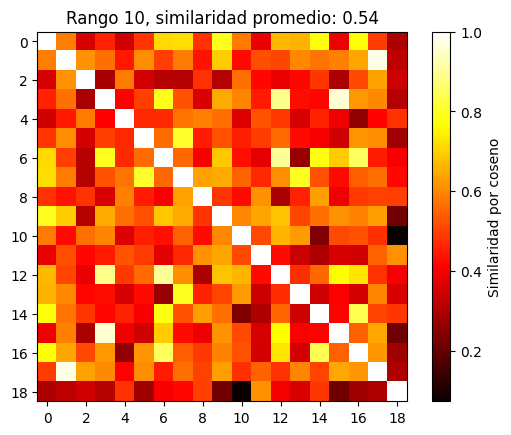

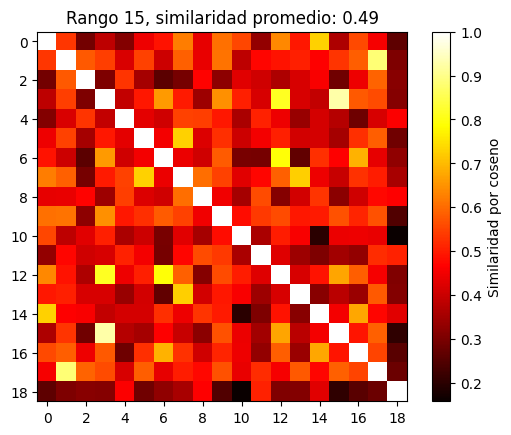

In [200]:
aproxs_norm = {}
similarity_matrixes = {}
for d in (5, 10, 15):
    aprox_norm = np.zeros((n, p**2))
    for i in range(n):
        aprox_norm[i] = aproxs[d][i] / np.linalg.norm(aproxs[d][i])
    aproxs_norm[d] = aprox_norm
    similarity_matrix = aprox_norm@aprox_norm.T
    mean_similarity = np.mean(similarity_matrix)
    similarity_matrixes[d] = similarity_matrix
    plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Similaridad por coseno')
    plt.title(f'Rango {d}, similaridad promedio: {mean_similarity:.2f}')
    plt.xticks(range(0, 20, 2))
    plt.yticks(range(0, 20, 2))
    plt.show()


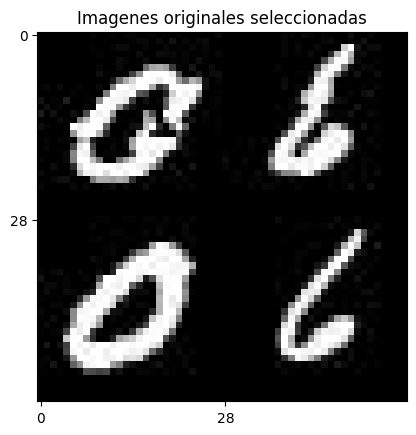

In [201]:
r = 10
similarity_threshold = 0.92
selected_images = np.where(similarity_matrixes[r] > similarity_threshold)
selected_images = [(i, j) for i, j in zip(selected_images[0], selected_images[1]) if i < j]
selected_images = list(set([i for i, j in selected_images] + [j for i, j in selected_images]))

collage = np.zeros((2*p, 2*p))
for i in range(len(selected_images)):
    for f in range(p):
        for c in range(p):
            collage[f + (i // 2) * 28, c + (i % 2) * 28] = A[selected_images[i]].reshape((p,p))[f,c]

plt.figure()
img = plt.imshow(collage, cmap = 'gray')
plt.xticks(np.arange(0, collage.shape[1], 28))
plt.yticks(np.arange(0, collage.shape[0], 28))
plt.title('Imagenes originales seleccionadas')
plt.show()

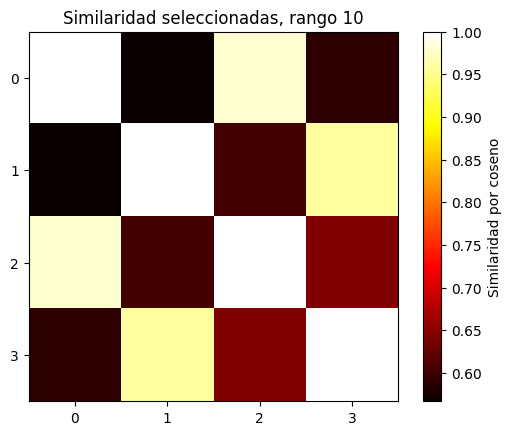

In [202]:
similarity_matrix = np.zeros((len(selected_images), len(selected_images)))
for i in range(len(selected_images)):
    for j in range(len(selected_images)):
        similarity_matrix[i,j] = similarity_matrixes[r][selected_images[i], selected_images[j]]
        similarity_matrix[j,i] = similarity_matrix[i,j]

plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Similaridad por coseno')
plt.title(f'Similaridad seleccionadas, rango {r}')
plt.xticks(range(0, len(selected_images)))
plt.yticks(range(0, len(selected_images)))
plt.show()

4. Dado el dataset dataset_imagenes2.zip encontrar d, el número mínimo de dimensiones a las que se
puede reducir la dimensionalidad de su representación mediante valores singulares tal que el error de
cada imagen comprimida y su original no exceda el 10% bajo la norma de Frobenius. Utilizando esta
ultima representación aprendida con el dataset 2 ¿Qué error de reconstrucción obtienen si utilizan la
misma compresión (con la misma base de d dimensiones obtenida del dataset 2) para las imagenes
dataset_imagenes1.zip?
2


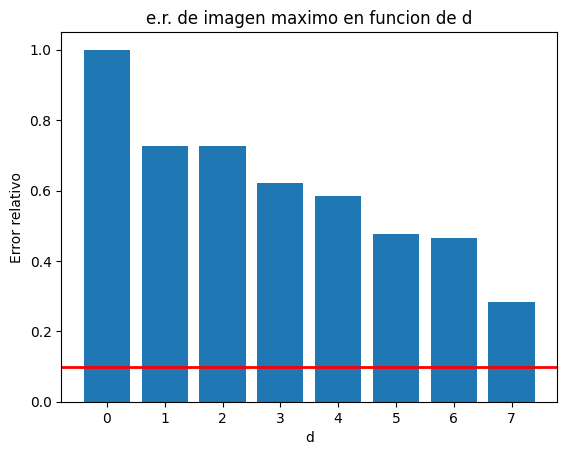

In [213]:
folder2 = "C:/Users/juand/OneDrive/Documentos/Workspace/I202/I202TP34/TP3/datasets_imgs_02"

image_names2 = os.listdir(folder2)
image_names2.sort()
n2 = len(image_names2)
p2 = len(imread(folder2 + "/" + image_names2[0]))
A2 = np.zeros((n2,p2**2))

for i in range(n2):
    A2[i] = imread(folder2 + "/" + image_names2[i]).flatten()

U2, S2, VT2 = np.linalg.svd(A2, full_matrices = False)
S2 = np.diag(S2)

errors2 = {}
max_errors2 = {}
aproxs2 = {}
for d in range(n2):
    aprox = U2[:,:d]@S2[:d,:d]@VT2[:d,:]
    errors2_i ={}
    for i in range(n2):
        errors2_i[i] = np.linalg.norm(A2[i] - aprox[i], 2) / np.linalg.norm(A2[i],2)
    errors2[d] = errors2_i
    max_errors2[d] = max(errors2_i.values())
    aproxs2[d] = aprox

plt.bar(max_errors2.keys(), max_errors2.values())
plt.xlabel('d')
plt.ylabel('Error relativo')
plt.title('e.r. de imagen maximo en funcion de d')
plt.axhline(y=0.1, color='r', linewidth=2)
plt.show()

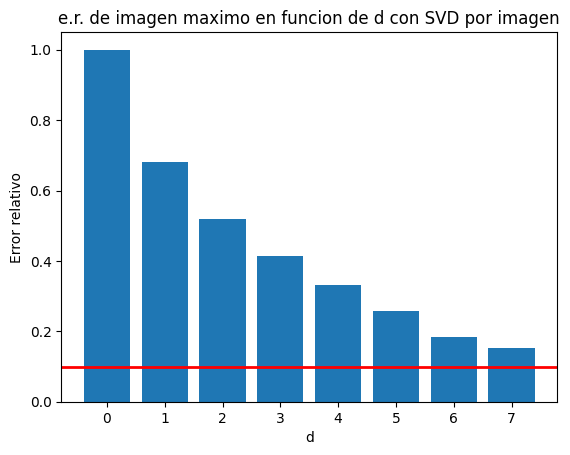

In [216]:
ind_aproxs2 = {}
ind_errors2 = {}
ind_max_errors2 = {}
for d in range(n2):
    for i in range(n2):
        U2, S2, VT2 = np.linalg.svd(A2[i].reshape((p2,p2)), full_matrices = False)
        S2 = np.diag(S2)
        aprox = U2[:,:d]@S2[:d,:d]@VT2[:d,:]
        ind_aproxs2[(d,i)] = aprox
        ind_errors2[(d,i)] = np.linalg.norm(A2[i] - aprox.flatten(), 2) / np.linalg.norm(A2[i],2)
    ind_max_errors2[d] = max([ind_errors2[(d,i)] for i in range(n2)])

plt.bar(ind_max_errors2.keys(), ind_max_errors2.values())
plt.xlabel('d')
plt.ylabel('Error relativo')
plt.title('e.r. de imagen maximo en funcion de d con SVD por imagen')
plt.axhline(y=0.1, color='r', linewidth=2)
plt.show()

In [204]:
"""filtro_errores = {k: v for k, v in dicc_max_errors.items() if v < 0.1}
d = min(filtro_errores.keys())
errors2 = []
for i in range(len(aproxs[d])):
    errors2.append(np.linalg.norm(originales[i] - aproxs[d][i], 'fro') / np.linalg.norm(originales[i],'fro'))
    
    

plt.bar(range(len(aproxs[d])), errors2)
plt.xlabel('Imagen')
plt.ylabel('Error relativo')
plt.xticks(range(0, 19))
plt.title('Error relativo por imagen del dataset 01 con d = ' + str(d))
plt.show()"""


ValueError: operands could not be broadcast together with shapes (28,28) (784,) 